## This is a dataset consist of the names of new born babyes from 1880 to 2018

In [19]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
PATH = "/gdrive/My Drive/Colab Notebooks/DataScience_Project/Popular Names Dataset/names/"

In [0]:
import pandas as pd

In [0]:
names1880 = pd.read_csv(PATH+"yob1880.txt", names = ['name', 'sex','births'])

In [27]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


### Group data to get the counts by sex

In [28]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

### Combine all the data file to one

In [0]:
years = range(1880,2018)

pieces = []
columns = ['name', 'sex','births']

for year in years:
  path = PATH+"yob%d.txt" % year
  frame = pd.read_csv(path, names = columns)
  
  frame['year'] = year
  pieces.append(frame)
  
names = pd.concat(pieces, ignore_index = True)

In [30]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1925008,Zykai,M,5,2017
1925009,Zykeem,M,5,2017
1925010,Zylin,M,5,2017
1925011,Zylis,M,5,2017


In [0]:
total_births = names.pivot_table(values = 'births', index ='year', columns ='sex',aggfunc = sum)

In [38]:
total_births.tail()

sex,F,M
year,,
2013,1751320,1888009
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837


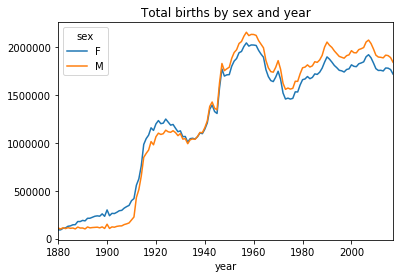

In [39]:
total_births.plot(title = "Total births by sex and year")